<a href="https://colab.research.google.com/github/karthika1498/clustering/blob/main/assignment_7_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question-1==>Airlines dataset**
- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [ ]:
air=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [ ]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
air.shape

(3999, 12)

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
air.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
air[air.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [ ]:
air.drop(["ID#"],inplace=True,axis=1)

In [ ]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard=StandardScaler()
scaler=standard.fit_transform(air)


In [ ]:
scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
new_scaler=pd.DataFrame(scaler)

In [ ]:
new_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


## hierarchical clustering 

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

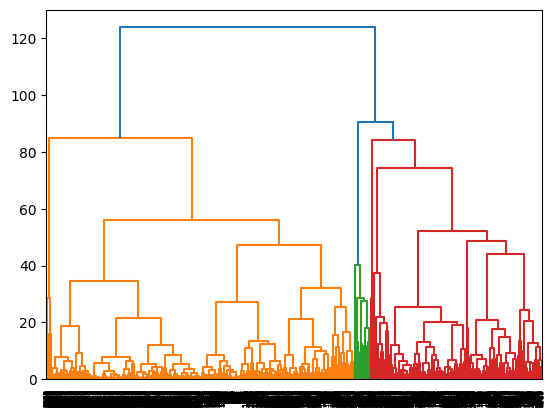

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(new_scaler,method="ward"))

In [ ]:
from scipy.spatial.distance import euclidean
h_clust=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [ ]:
h_clust.fit(new_scaler)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
y_hc=h_clust.fit_predict(new_scaler)

In [ ]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
air["cluster_no"]=y_hc

In [ ]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,custer_no,cluster_no
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


In [ ]:
air1=air.sort_values("cluster_no")

In [ ]:
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,custer_no,cluster_no
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0,0
1455,49438,0,4,1,1,33912,14,0,0,5085,1,0,0
1453,190208,0,4,1,1,37122,38,1800,6,5091,0,0,0
1452,147822,0,4,1,1,42469,18,0,0,5107,1,0,0
1450,118601,0,5,1,1,51240,19,0,0,5105,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,117329,0,1,2,1,6448,11,0,0,7416,1,3,3
2967,8210,0,1,2,1,9122,16,0,0,3312,1,3,3
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,3,3
2006,101901,0,1,2,1,17898,22,100,1,4433,0,3,3


In [ ]:
air1["cluster_no"].value_counts()

1    2446
0    1380
2     130
3      43
Name: cluster_no, dtype: int64

In [ ]:
air1.groupby("cluster_no").agg(["mean"]).reset_index()

,cluster_no,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,custer_no
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043,0.0
1,1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,1.0
2,2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,2.0
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.0


K-Means clustering==>Airlines

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [ ]:
air=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.drop(["ID#"],axis=1,inplace=True)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
scaler=standard.fit_transform(air)
scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
new_scaler=pd.DataFrame(scaler)
new_scaler

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

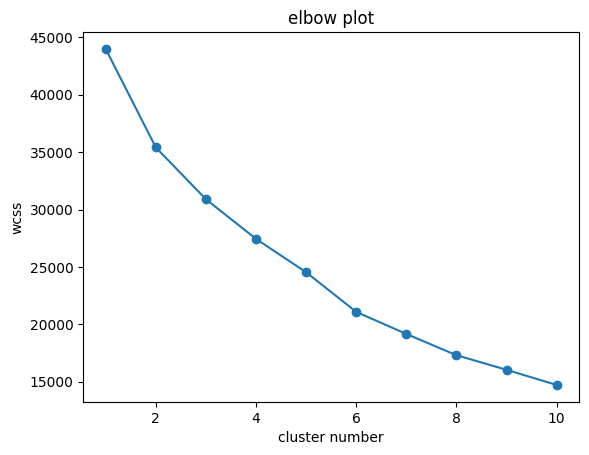

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(new_scaler)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss,marker='o')
plt.title("elbow plot")
plt.xlabel("cluster number")
plt.ylabel("wcss")
plt.show()

In [ ]:
#take k value as 4
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=42).fit(new_scaler)
kmeans

KMeans(n_clusters=4, random_state=42)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
new_kmeans=kmeans.labels_

In [ ]:
air["cluster_id"]=new_kmeans

In [ ]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,custer_no,cluster_no,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1,0


In [ ]:
air.groupby("cluster_no").agg(["mean"]).reset_index()

,cluster_no,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,custer_no,cluster_id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043,0.0,1.768116
1,1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,1.0,0.077678
2,2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,2.0,1.030769
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.0,0.232558


DBSCAN==>Airlines

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (3).xlsx


In [ ]:
air=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.drop(["ID#"],axis=1,inplace=True)

In [ ]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
standard=StandardScaler()
scaler=standard.fit_transform(air)
scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
new_scaler=pd.DataFrame(scaler)
new_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=3,min_samples=4)
predict=model.fit_predict(new_scaler)
predict


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
new_pred=pd.DataFrame(predict)

In [ ]:
new_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [ ]:
air["cluster_id"]=new_pred

In [ ]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [ ]:
air[air['cluster_id']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
126,602064,0,5,1,1,194753,26,2250,10,7652,1,-1
151,930410,0,5,1,1,211284,18,2250,6,7640,1,-1
186,707079,0,4,1,1,57173,40,3450,12,7523,1,-1
190,123516,0,5,1,1,240544,31,500,2,7507,1,-1
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,-1
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,-1
343,112501,0,1,1,2,19140,11,0,0,7101,0,-1


In [ ]:
air["cluster_id"].value_counts()

 0    3897
-1      59
 2      25
 1      14
 3       4
Name: cluster_id, dtype: int64

**question-2**
- **crime data==>hierarchical cluster**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.drop(["Unnamed: 0"],inplace=True,axis=1)

In [ ]:
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime.shape

(50, 4)

In [ ]:
crime[crime.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [ ]:
standard=StandardScaler()
scaler=standard.fit_transform(crime)
scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
new_scaler=pd.DataFrame(scaler)

In [ ]:
new_scaler.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


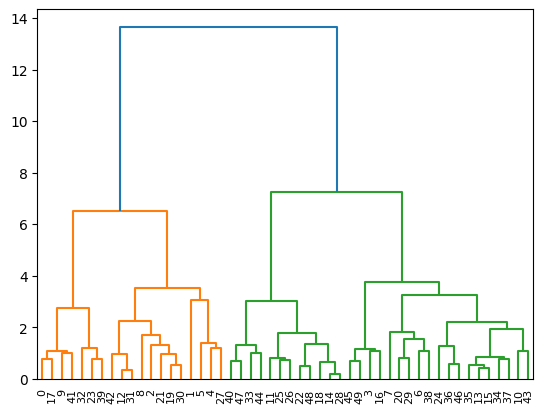

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(new_scaler,method="ward"))

In [ ]:
model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
pred=model.fit_predict(new_scaler)

In [ ]:
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [ ]:
new_pred=pd.DataFrame(pred)

In [ ]:
new_pred

,0
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [ ]:
crime["cluster_id"]=new_pred

In [ ]:
crime

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [ ]:
crime["cluster_id"].value_counts()

0    19
1    19
2    12
Name: cluster_id, dtype: int64

In [ ]:
crime.groupby(["cluster_id"]).agg(["mean"]).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.331579,259.315789,68.315789,29.215789
1,1,6.210526,142.052632,71.263158,19.184211
2,2,3.091667,76.000000,52.083333,11.833333


**KMeans==>Crime**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
crime=pd.read_csv("crime_data.csv")

In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.drop(["Unnamed: 0"],inplace=True,axis=1)

In [ ]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
standard=StandardScaler()
scaler=standard.fit_transform(crime)
scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
new_scaler=pd.DataFrame(scaler)
new_scaler

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


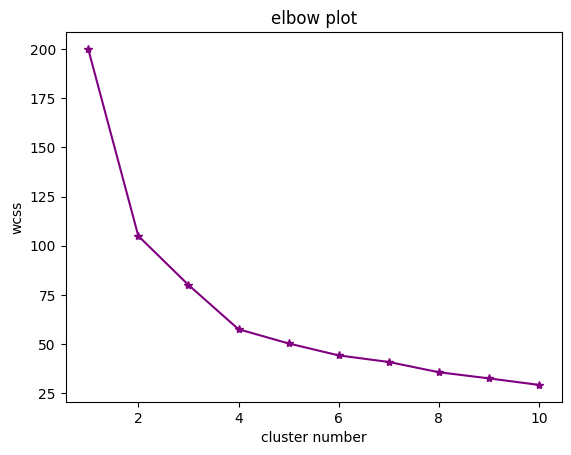

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(new_scaler)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker="*",color="purple")
plt.title("elbow plot")
plt.xlabel("cluster number")
plt.ylabel("wcss")
plt.show()

In [ ]:
#take 4 cluster 
model=KMeans(n_clusters=4,random_state=42)
pred=model.fit(new_scaler)
pred


KMeans(n_clusters=4, random_state=42)

In [ ]:
pred.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [ ]:
new_pred=pd.DataFrame(pred.labels_)
new_pred.head()

,0
0,1
1,2
2,2
3,1
4,2


In [ ]:
crime["cluster_id"]=new_pred
crime.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


In [ ]:
crime["cluster_id"].value_counts()

0    16
2    13
3    13
1     8
Name: cluster_id, dtype: int64

In [ ]:
crime.groupby(["cluster_id"]).agg(["mean"]).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


**DBSCAN==>crime**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (3).csv


In [ ]:
crime=pd.read_csv("crime_data.csv")

In [ ]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime.drop(["Unnamed: 0"],inplace=True,axis=1)

In [ ]:
standard=StandardScaler()
scaler=standard.fit_transform(crime)
scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
new_scaler=pd.DataFrame(scaler)

In [ ]:
model=DBSCAN(eps=1,min_samples=3)
pred=model.fit_predict(new_scaler)

In [ ]:
pred

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
new_pred=pd.DataFrame(pred)

In [ ]:
crime["cluster_id"]=new_pred

In [ ]:
crime

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [ ]:
crime[crime["cluster_id"]==-1]

,Murder,Assault,UrbanPop,Rape,cluster_id
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
10,5.3,46,83,20.2,-1
27,12.2,252,81,46.0,-1
32,13.0,337,45,16.1,-1


In [ ]:
crime.groupby(["cluster_id"]).agg(["mean"]).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.560,243.500000,70.800000,30.430000
1,0,14.950,237.000000,55.833333,22.616667
2,1,4.825,112.035714,63.357143,16.107143
3,2,11.400,234.666667,83.000000,25.200000
4,3,11.600,280.000000,70.333333,31.666667
